<a href="https://colab.research.google.com/github/androbaza/IP-algos/blob/main/2_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from imageio import imread
from skimage.transform import resize
from scipy.ndimage.filters import convolve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(128, 128)


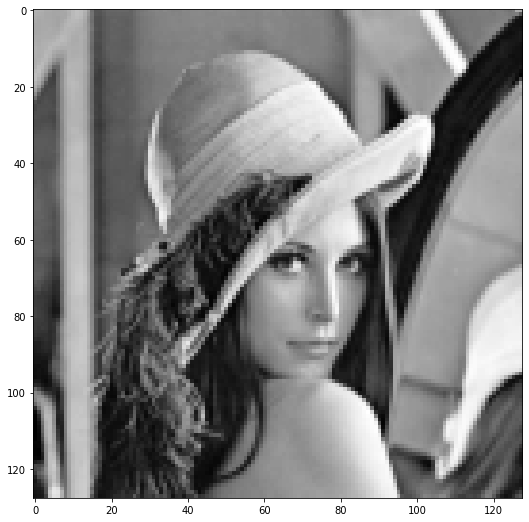

In [3]:
im = imread("/content/drive/MyDrive/samples/lena.jpg", pilmode="L")
im = resize(im, (128,128), order=1, mode="reflect", anti_aliasing=True)
im = (im * 255).astype(np.uint8)

print(im.shape)

fig = plt.figure(figsize=(16,9))
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

# Exercise 2: Spatial Filtering

**Filtering** is a discrete convolution of an image $I$ with a filter mask $A \in \mathbb{R}^{m \times n}$:

$$
\begin{align}
 I_{A}       &= I * A \\
 I_{A}(i, j) &= \left(I * A\right)(i, j) \\
             &= \sum_{h=1}^{m} \sum_{k=1}^{n} A(h, k) \cdot I\left( i+h-1-\left\lfloor\frac{m}{2}\right\rfloor,\; j+k-1-\left\lfloor\frac{n}{2}\right\rfloor \right)
\end{align}
$$

Typically, the filter masks are square matrices, i.e., $n=m$ with odd dimensions (e.g., $3 \times 3, 5 \times 5, 7 \times 7, \dotsc$).

A special case of filter masks is the **box filter**:

$$
\begin{align}
  B =%
  \dfrac{1}{9}\begin{pmatrix}
              1&1&1\\1&1&1\\1&1&1
             \end{pmatrix}.
\end{align}
$$

## Task 2 - Convolution Implementation

- Write a function, that applies an arbitrary (squared) filter to an image.
- Is there any way to speed up your code?
- Test your code (possibly different implementations) and compare the runtimes.
- Compare your implementation with the built-in method `convolve` from `scipy.ndimage.filters` (quality and runtime).

### Implementations

In [23]:
def imfilter1(im, mask):
    
    h, w = im.shape
    m, n = mask.shape
    
    m_delta, n_delta = m // 2, n // 2
    result = np.zeros(im.shape, dtype=np.float32)
    
    # Iterate over the image
    for x in range(h):
        for y in range(w):
            weighted_patch = np.zeros_like(mask)
            
            # Iterate over the filter mask
            for y_mask in range(-n_delta, n - 1):
                for x_mask in range(-m_delta, m - 1):

                    # compute for each position of the weight
                    # according coordinates in input image
                    y_src = y - y_mask ### FILL ME!
                    x_src = x - x_mask ### FILL ME!
                    
                    # get pixel value and the mask weight, 
                    # multiply them, store them in the 
                    # weighted patch and ...
                    if (y_src >= 0) and (y_src < w) and (x_src >= 0) and (x_src < h):
                      pixel = im[x_src, y_src] ### FILL ME!
                      weight = mask[x_mask, y_mask] ### FILL ME!
                      weighted_patch[y_mask, x_mask] = pixel * weight ### FILL ME!
                    
            # ... sum it up in the result image
            result[x,y] = np.sum(weighted_patch) ### FILL ME
    
    return result.astype(im.dtype)

In [45]:
def imfilter2(im, mask, mode="edge"):
    
    h, w = im.shape
    m, n = mask.shape
    
    m_delta, n_delta = m // 2, n // 2
    
    # extend (pad) the image
    im_padded = np.pad(im, [(m_delta, m_delta), (n_delta, n_delta)], mode=mode)
    result = np.zeros(im.shape, dtype=np.float32)
    
    for x in range(h):
      for y in range(w):
          weighted_patch = np.zeros_like(mask)
          
          # Iterate over the filter mask
          for y_mask in range(-n_delta, n - 1):
              for x_mask in range(-m_delta, m - 1):

                  # compute for each position of the weight
                  # according coordinates in input image
                  y_src = y - y_mask ### FILL ME!
                  x_src = x - x_mask ### FILL ME!

                  pixel = im_padded[x_src, y_src] ### FILL ME!
                  weight = mask[x_mask, y_mask] ### FILL ME!
                  weighted_patch[y_mask, x_mask] = pixel * weight ### FILL ME!
                  
          # ... sum it up in the result image
          result[x,y] = np.sum(weighted_patch) ### FILL ME

    return result.astype(im.dtype)

### Runtime comparison

In [67]:
# TODO: construct the box filter with the given size
size = 5
coeff = 1/25 # feel free to experiment with different sizes
B = coeff * np.ones([size, size])### FILL ME!

print(B)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [68]:
# Compute convolution with different methods and display the runtimes

I = im.copy()

print("imfilter1")
%time I1 = imfilter1(I, B)

print("imfilter2")
%time I2 = imfilter2(I, B)

print("convolve")
%time I3 = convolve(I, B, mode='nearest')

imfilter1
CPU times: user 3.12 s, sys: 209 ms, total: 3.33 s
Wall time: 2.94 s
imfilter2
CPU times: user 2.6 s, sys: 99.1 ms, total: 2.7 s
Wall time: 2.54 s
convolve
CPU times: user 1.62 ms, sys: 0 ns, total: 1.62 ms
Wall time: 911 µs


### Visual comparison

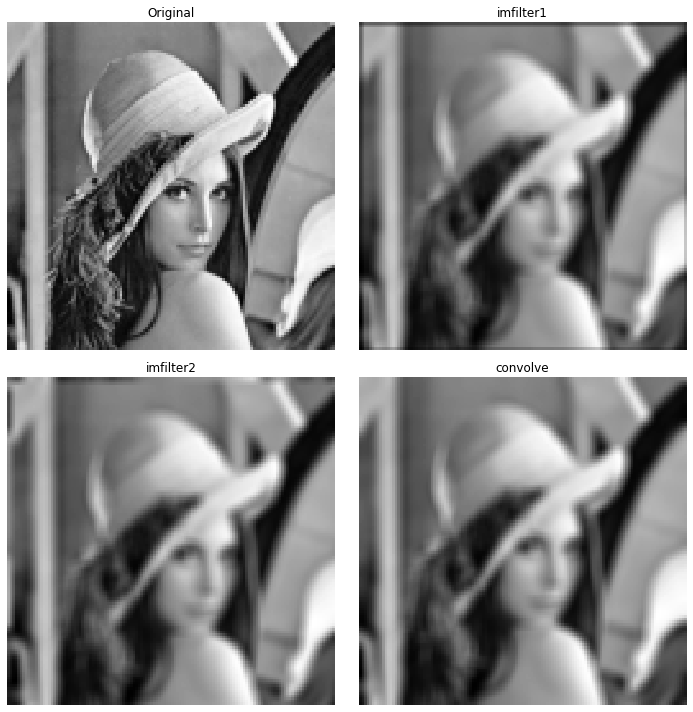

In [69]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

axs[0,0].imshow(I, cmap=plt.cm.gray, interpolation='nearest')
axs[0,0].set_title("Original")

axs[0,1].imshow(I1, cmap=plt.cm.gray, interpolation='nearest')
axs[0,1].set_title("imfilter1")

axs[1,0].imshow(I2, cmap=plt.cm.gray, interpolation='nearest')
axs[1,0].set_title("imfilter2")

axs[1,1].imshow(I3, cmap=plt.cm.gray, interpolation='nearest')
axs[1,1].set_title("convolve")

for ax in axs.ravel():
    ax.axis('off')

fig.tight_layout()
plt.show()

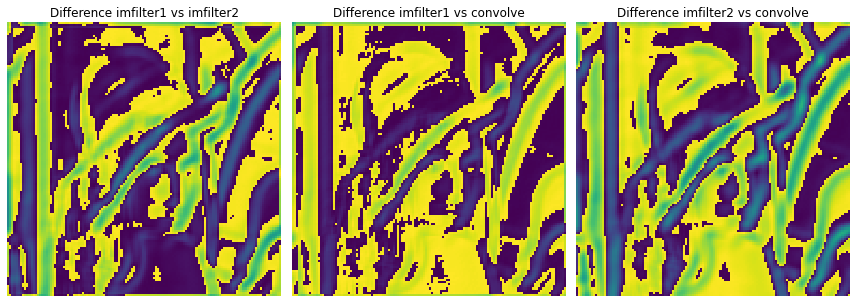

In [75]:
fig, axs = plt.subplots(1,3, figsize=(12,5))

axs[0].imshow(np.abs(I1-I2), vmin=0, vmax=255, interpolation='nearest')
axs[0].set_title("Difference imfilter1 vs imfilter2")

axs[1].imshow(np.abs(I1-I3), vmin=0, vmax=255, interpolation='nearest')
axs[1].set_title("Difference imfilter1 vs convolve")

axs[2].imshow(np.abs(I2-I3), vmin=0, vmax=255, interpolation='nearest')
axs[2].set_title("Difference imfilter2 vs convolve")

for ax in axs.ravel():
    ax.axis('off')

fig.tight_layout()
plt.show()

* the first implementation obviously suffers from vignetting, as the function does not do the convolution at the outermost pixels of the image. 

* the 2nd implementation tries to overcome this, by padding the convolution source image, but this is still visible due to simple padding technique. using bicubic interpolation could probably improve it a bit more.

* the final, pixel-wise difference in filter 1 and 2 is not clear, as the implementations only differ by the behavior on the padding pixels and not in the center.

* the scipy implemenation is 3000 times faster, possibly due to more efficient datatypes used, and dropping unnecessary condition checks as the check of border pixels in filter 1, for instance.

* box filter blurs the convolved image, as the convolution result are pixel values averaged with the size of the box filter.